In [11]:
!pip install fastparquet





   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 3.4 MB/s  0:00:007.1 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 5.2 MB/s  0:00:00m 4.4 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [fastparquet]━━━━━━ 2/3 [fastparquet]


In [1]:
# ----------- Imports -----------
import pandas as pd

# ----------- Dataset Path -----------
dataset_path = "/home/netramn/Desktop/ML/MainDataset.parquet"

# ----------- Check if file exists -----------
import os
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"Dataset not found at: {dataset_path}")

# ----------- Load Parquet File using fastparquet -----------
# Make sure you install fastparquet first:
# pip install fastparquet
df = pd.read_parquet(dataset_path, engine='fastparquet')

# ----------- Inspect Columns and Shape -----------
print("Columns:", list(df.columns))
print("\nDataFrame shape:", df.shape)

# ----------- Display First Row Summary -----------
print("\nFirst row summary:")
for col in df.columns:
    sample = df[col].iloc[0]
    print(f" - {col}: type={type(sample)}, sample_repr={repr(sample)[:200]}")


Columns: ['imageA.bytes', 'imageA.path', 'imageB.bytes', 'imageB.path']

DataFrame shape: (76, 4)

First row summary:
 - imageA.bytes: type=<class 'bytes'>, sample_repr=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x07@\x00\x00\x07@\x08\x02\x00\x00\x00\xc9\x97\xcd\x84\x00\x00 \x00IDATx\x01\xec\xc1Q\x96-\xc9q,V3\xf3\x88<\xb7\x01Q\x9a\xff8\x1f\x89[\x95\xe1n\xa6\xac\xea
 - imageA.path: type=<class 'NoneType'>, sample_repr=None
 - imageB.bytes: type=<class 'bytes'>, sample_repr=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x19\x00\x00\x02\x19\x08\x02\x00\x00\x00\x84x\xba\xdc\x00\x00 \x00IDATx\x01\xec\xc1\x8bv$\xd9ue\xd9\xb5\xcf\xbdf\xee@\xe4S\x12%u\xfd\xff\xb7\xd5\x18\xd
 - imageB.path: type=<class 'NoneType'>, sample_repr=None


In [2]:
# Aim: Load parquet dataset and inspect columns and sample rows
import pandas as pd
import os

dataset_path = r"/home/netramn/Desktop/ML/MainDataset.parquet"

# Check if file exists
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"Dataset not found at: {dataset_path}")

# Load Parquet using fastparquet
# Make sure fastparquet is installed: pip install fastparquet
df = pd.read_parquet(dataset_path, engine='fastparquet')

# Inspect columns and sample rows
print("Columns:", list(df.columns))
print("\nFirst 3 rows:")
print(df.head(3))


Columns: ['imageA.bytes', 'imageA.path', 'imageB.bytes', 'imageB.path']

First 3 rows:
                                        imageA.bytes imageA.path  \
0  b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...        None   
1  b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...        None   
2  b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...        None   

                                        imageB.bytes imageB.path  
0  b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...        None  
1  b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...        None  
2  b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...        None  


In [4]:
import io
from PIL import Image
import numpy as np

# Example dataset path (for this session)
dataset_path = "/home/netramn/Desktop/ML/MainDataset.parquet"

def decode_image(entry, img_size=128, gray=False):
    """
    Decode an image stored as {'bytes': b'...'}.
    Converts to RGB or grayscale, resizes, and returns a NumPy array.

    Parameters:
    - entry: dict with key 'bytes'
    - img_size: int, output width & height
    - gray: bool, convert to grayscale if True

    Returns:
    - NumPy array of shape (img_size, img_size, 3) for RGB
      or (img_size, img_size) for grayscale
    """
    if not isinstance(entry, dict) or "bytes" not in entry:
        raise ValueError("Expected entry format: {'bytes': <raw bytes>}")

    raw_bytes = entry["bytes"]

    try:
        img = Image.open(io.BytesIO(raw_bytes))
    except Exception as e:
        raise ValueError(f"Failed to open image: {e}")

    # Convert color
    img = img.convert("L") if gray else img.convert("RGB")

    # Resize
    img = img.resize((img_size, img_size))

    return np.array(img, dtype=np.float32) / 255.0   # normalize to [0,1]


Loaded dataframe with shape: (76, 2)
Photo shape: (128, 128, 3)
Sketch shape: (128, 128)


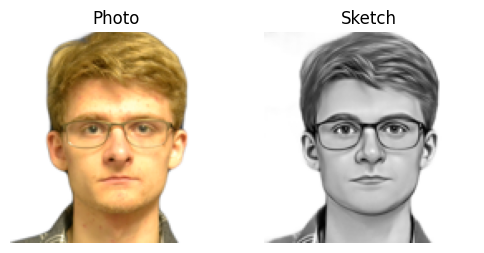

In [5]:
# Aim: Load the first photo–sketch pair from the parquet dataset,
# decode them, preprocess, print shapes, and visualize side-by-side.

import pandas as pd
import io
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# ----------- Dataset Path -----------
dataset_path = "/home/netramn/Desktop/ML/MainDataset.parquet"

# ----------- Load DataFrame -----------
df = pd.read_parquet(dataset_path)
print("Loaded dataframe with shape:", df.shape)

# ----------- Image Decoder -----------
def decode_image(entry, img_size=128, gray=False):
    """
    Decodes an image stored as {'bytes': b'...'} from the parquet file.
    Converts it to RGB or grayscale, resizes, and returns a NumPy array.
    """
    raw_bytes = entry["bytes"]

    img = Image.open(io.BytesIO(raw_bytes))

    img = img.convert("L") if gray else img.convert("RGB")
    img = img.resize((img_size, img_size))

    return np.array(img, dtype=np.float32) / 255.0  # normalize to [0,1]

# ----------- Load First Pair -----------
p_entry = df["imageA"].iloc[0]  # photo
s_entry = df["imageB"].iloc[0]  # sketch

# Decode both images
p_img = decode_image(p_entry, img_size=128, gray=False)
s_img = decode_image(s_entry, img_size=128, gray=True)

# Print shapes
print("Photo shape:", p_img.shape)
print("Sketch shape:", s_img.shape)

# ----------- Visualization -----------
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.imshow(p_img)
plt.title("Photo")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(s_img, cmap="gray")
plt.title("Sketch")
plt.axis("off")

plt.show()


In [6]:
# Aim: Load all photo–sketch pairs from the parquet dataset,
# decode and preprocess them to 128x128, normalize to [0,1],
# build NumPy arrays X and y, and split them into 80% training
# and 20% testing sets.

import pandas as pd
import io
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

# ----------- Dataset Path -----------
dataset_path = "/home/netramn/Desktop/ML/MainDataset.parquet"

# ----------- Load DataFrame -----------
df = pd.read_parquet(dataset_path)
print("Loaded dataframe with shape:", df.shape)

# ----------- Image Decoder -----------
def decode_image(entry, img_size=128, gray=False):
    raw_bytes = entry["bytes"]
    img = Image.open(io.BytesIO(raw_bytes))
    img = img.convert("L") if gray else img.convert("RGB")
    img = img.resize((img_size, img_size))
    return np.array(img, dtype=np.float32) / 255.0  # normalize

# ----------- Process All Photo–Sketch Pairs -----------
photo_col, sketch_col = "imageA", "imageB"
photos, sketches = [], []

for i in range(len(df)):
    p_entry = df[photo_col].iloc[i]
    s_entry = df[sketch_col].iloc[i]

    p_img = decode_image(p_entry, img_size=128, gray=False)
    s_img = decode_image(s_entry, img_size=128, gray=True)

    photos.append(p_img)
    sketches.append(s_img)

# ----------- Build NumPy Arrays -----------
X = np.array(photos, dtype=np.float32)                      # (N,128,128,3)
y = np.array(sketches, dtype=np.float32)[..., np.newaxis]   # (N,128,128,1)

print("X shape:", X.shape)
print("y shape:", y.shape)

# ----------- Train/Test Split -----------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Train shapes:", X_train.shape, y_train.shape)
print("Test shapes:", X_test.shape, y_test.shape)


Loaded dataframe with shape: (76, 2)
X shape: (76, 128, 128, 3)
y shape: (76, 128, 128, 1)
Train shapes: (60, 128, 128, 3) (60, 128, 128, 1)
Test shapes: (16, 128, 128, 3) (16, 128, 128, 1)


In [7]:
# Aim:
# Import essential TensorFlow/Keras layers, models, and backend tools

import tensorflow as tf
from tensorflow.keras.layers import (
    Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate
)
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K



2025-11-27 09:08:18.791726: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-27 09:08:18.847657: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX512_FP16 AVX_VNNI AMX_TILE AMX_INT8 AMX_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-27 09:08:20.218414: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [8]:
# Aim:
# Define SSIM loss and a combined MAE + SSIM loss function.

import tensorflow as tf

def ssim_loss(y_true, y_pred):
    """
    Structural Similarity (SSIM) loss.
    Higher SSIM → lower loss.
    """
    return 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred, max_val=1.0))

def combined_loss(y_true, y_pred):
    """
    Combined loss = MAE + SSIM.
    MAE ensures pixel accuracy, SSIM ensures structure and edges.
    """
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))
    return mae + ssim_loss(y_true, y_pred)


In [9]:
# Aim:
# Build a U-Net model using 3 encoder blocks, bottleneck,
# and 3 decoder blocks. Input = RGB photo, Output = grayscale sketch.

def build_unet(input_shape=(128, 128, 3)):
    inputs = Input(input_shape)

    # ----- Encoder -----
    # Block 1
    c1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, 3, activation='relu', padding='same')(c1)
    p1 = MaxPooling2D(2)(c1)

    # Block 2
    c2 = Conv2D(128, 3, activation='relu', padding='same')(p1)
    c2 = Conv2D(128, 3, activation='relu', padding='same')(c2)
    p2 = MaxPooling2D(2)(c2)

    # Block 3
    c3 = Conv2D(256, 3, activation='relu', padding='same')(p2)
    c3 = Conv2D(256, 3, activation='relu', padding='same')(c3)
    p3 = MaxPooling2D(2)(c3)

    # ----- Bottleneck -----
    c4 = Conv2D(512, 3, activation='relu', padding='same')(p3)
    c4 = Conv2D(512, 3, activation='relu', padding='same')(c4)

    # ----- Decoder -----
    # Up Block 1
    u5 = Conv2DTranspose(256, 2, strides=2, padding='same')(c4)
    u5 = concatenate([u5, c3])
    c5 = Conv2D(256, 3, activation='relu', padding='same')(u5)
    c5 = Conv2D(256, 3, activation='relu', padding='same')(c5)

    # Up Block 2
    u6 = Conv2DTranspose(128, 2, strides=2, padding='same')(c5)
    u6 = concatenate([u6, c2])
    c6 = Conv2D(128, 3, activation='relu', padding='same')(u6)
    c6 = Conv2D(128, 3, activation='relu', padding='same')(c6)

    # Up Block 3
    u7 = Conv2DTranspose(64, 2, strides=2, padding='same')(c6)
    u7 = concatenate([u7, c1])
    c7 = Conv2D(64, 3, activation='relu', padding='same')(u7)
    c7 = Conv2D(64, 3, activation='relu', padding='same')(c7)

    # ----- Output -----
    outputs = Conv2D(1, 1, activation='sigmoid')(c7)

    return Model(inputs, outputs)


In [10]:
# Aim: Split the dataset (X, y) into training and testing sets: 80% train, 20% test.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,   # 20% for testing
    random_state=42
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


Train shape: (60, 128, 128, 3) (60, 128, 128, 1)
Test shape: (16, 128, 128, 3) (16, 128, 128, 1)


In [11]:
# Aim:
# Compile the U-Net using the combined MAE + SSIM loss and Adam optimizer.

input_shape = X_train.shape[1:]  # e.g., (128,128,3)

unet_model = build_unet(input_shape)
unet_model.compile(
    optimizer='adam',
    loss=combined_loss,
    metrics=['mae']
)

unet_model.summary()


W0000 00:00:1764214793.242749  831625 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 128, 128,  │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 128, 128,  │     36,928 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 64, 64,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 64, 64,    │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 64, 64,    │    147,584 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 32, 32,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 32, 32,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 32, 32,    │    590,080 │ conv2d_4[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 16, 16,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 16, 16,    │  1,180,160 │ max_pooling2d_2[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 16, 16,    │  2,359,808 │ conv2d_6[0][0]    │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose    │ (None, 32, 32,    │    524,544 │ conv2d_7[0][0]    │
│ (Conv2DTranspose)   │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 32, 32,    │          0 │ conv2d_transpose… │
│ (Concatenate)       │ 512)              │            │ conv2d_5[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 32, 32,    │  1,179,904 │ concatenate[0][0] │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 32, 32,    │    590,080 │ conv2d_8[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_1  │ (None, 64, 64,    │    131,200 │ conv2d_9[0][0]  

 Total params: 7,697,345 (29.36 MB)

 Trainable params: 7,697,345 (29.36 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
save_path = "/home/netramn/Desktop/ML/imagetosketch.h5"

unet_model.save(save_path)

print(f"Model saved successfully at: {save_path}")


Model saved successfully at: /home/netramn/Desktop/ML/imagetosketch.h5


In [17]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

# Split data: 80% train, 20% validation
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Early stopping callback
early_stop = EarlyStopping(
    monitor='val_mae',        # monitor validation MAE
    patience=10,              # stop if no improvement for 10 epochs
    restore_best_weights=True
)

# Train the model
history = unet_model.fit(
    X_train_split, y_train_split,  # training data
    validation_data=(X_val, y_val),# validation data
    batch_size=64,
    epochs=1000,
    callbacks=[early_stop],
    shuffle=True
)


Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.9841 - mae: 0.3720 - val_loss: 0.9332 - val_mae: 0.3448
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.9340 - mae: 0.3431 - val_loss: 0.8698 - val_mae: 0.3238
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.8720 - mae: 0.3228 - val_loss: 0.7954 - val_mae: 0.2879
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.7987 - mae: 0.2879 - val_loss: 0.6947 - val_mae: 0.2338
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.6993 - mae: 0.2354 - val_loss: 0.6140 - val_mae: 0.1851
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.6199 - mae: 0.1894 - val_loss: 0.6012 - val_mae: 0.1778
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.6060 - mae: 0.1830 - val_loss: 0.6086 - val_mae: 0.1813
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.6126 - mae: 0.1871 - val_loss: 0.6093 - val_mae: 0.1819
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.6125 - mae: 0.1879 - 

In [18]:


import numpy as np

# Best validation MAE
best_epoch = np.argmin(history.history['val_mae'])
best_val_mae = np.min(history.history['val_mae'])

print(f"Best epoch: {best_epoch+1}")
print(f"Best validation MAE: {best_val_mae}")







Best epoch: 94
Best validation MAE: 0.05601286515593529


Model loaded successfully!
Evaluating on test dataset...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step

===== Test Set Performance =====
Average MAE : 0.35612720251083374
Average MSE : 0.15519938059151173
Average SSIM: 0.34581193133066307
Average PSNR: 8.116552463173178
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━

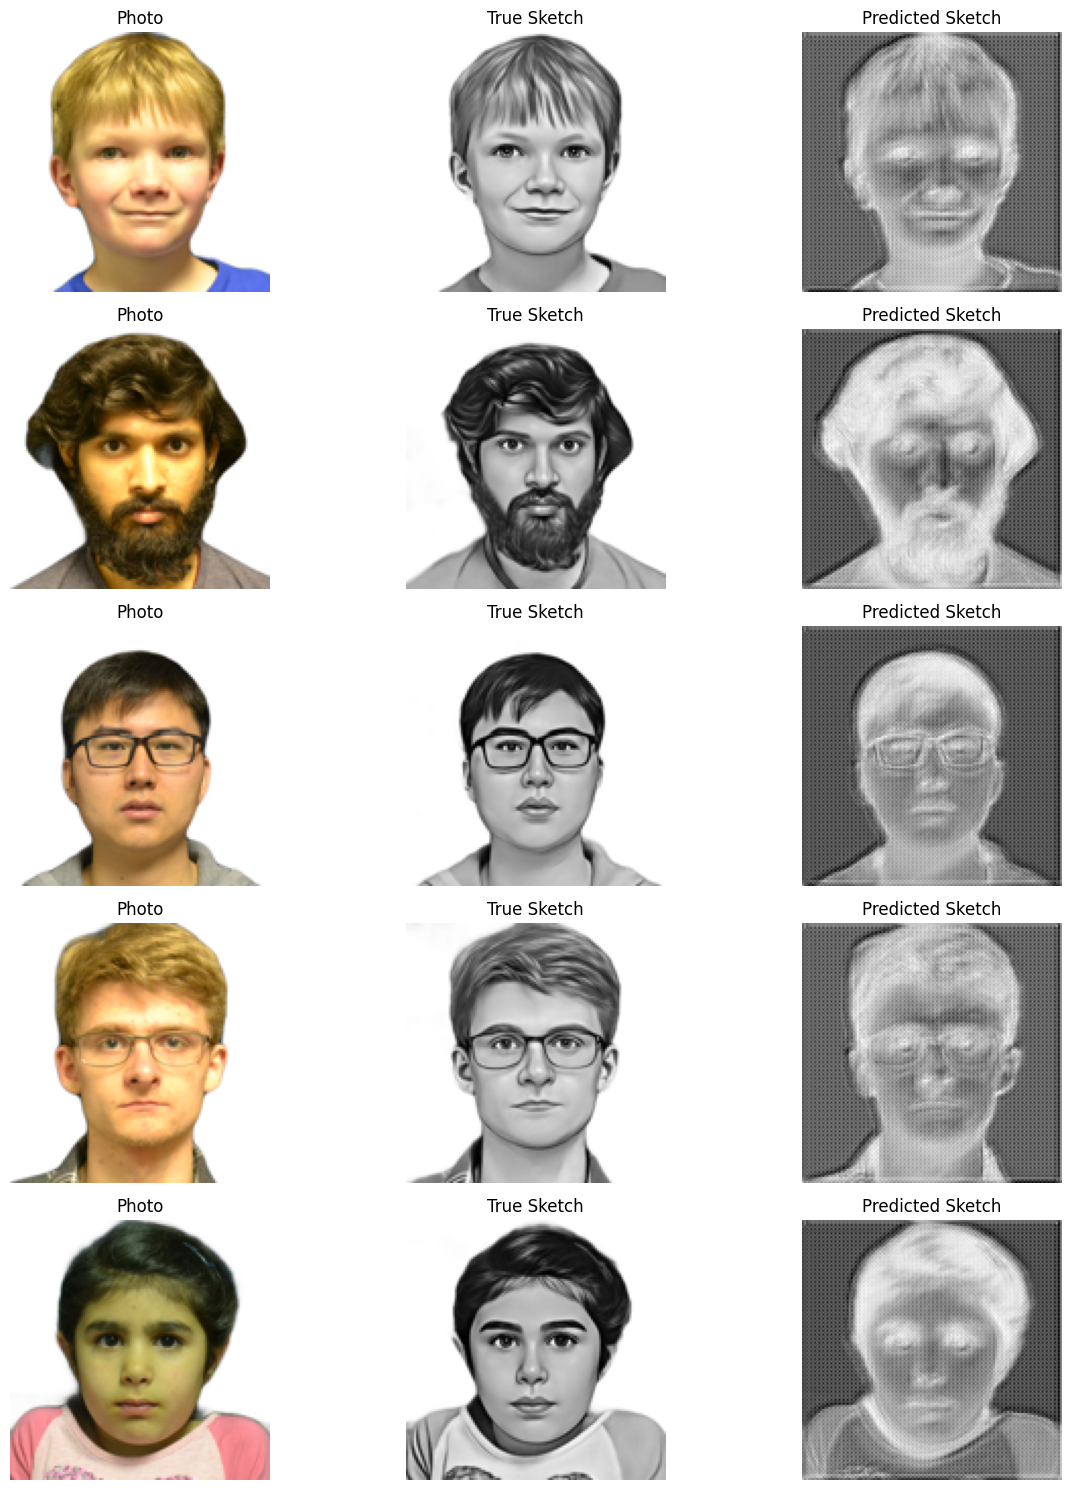

In [21]:

"""
Aim:
Load the trained U-Net (.h5) model and test it on X_test and y_test.
Compute MAE, MSE, SSIM, PSNR and visualize predicted sketches.
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
import tensorflow as tf
from tensorflow.keras.models import load_model

# --------------------------
# Loss functions required for loading
# --------------------------
def ssim_loss(y_true, y_pred):
    return 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred, max_val=1.0))

def combined_loss(y_true, y_pred):
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))
    return mae + ssim_loss(y_true, y_pred)

# --------------------------
# Load trained .h5 model
# --------------------------
model_path = "/home/netramn/Desktop/ML/imagetosketch.h5"  # your saved model path

unet_model = load_model(
    model_path,
    compile=False,   # faster loading
    custom_objects={"combined_loss": combined_loss, "ssim_loss": ssim_loss}
)

print("Model loaded successfully!")

# --------------------------
# Evaluate on X_test
# --------------------------
mae_list, mse_list, ssim_list, psnr_list = [], [], [], []

print("Evaluating on test dataset...")

for i in range(len(X_test)):
    true_s = y_test[i].squeeze()
    pred_s = unet_model.predict(X_test[i][None])[0].squeeze()  # add batch dimension

    mae_list.append(mean_absolute_error(true_s, pred_s))
    mse_list.append(mean_squared_error(true_s, pred_s))
    ssim_list.append(ssim(true_s, pred_s, data_range=1.0))
    psnr_list.append(psnr(true_s, pred_s, data_range=1.0))

print("\n===== Test Set Performance =====")
print("Average MAE :", np.mean(mae_list))
print("Average MSE :", np.mean(mse_list))
print("Average SSIM:", np.mean(ssim_list))
print("Average PSNR:", np.mean(psnr_list))

# --------------------------
# Visualize Random Predictions
# --------------------------
num_samples = 5
indices = np.random.choice(len(X_test), num_samples, replace=False)

plt.figure(figsize=(13, num_samples * 3))

for i, idx in enumerate(indices):
    photo = X_test[idx]
    true_s = y_test[idx].squeeze()
    pred_s = unet_model.predict(photo[None])[0].squeeze()

    plt.subplot(num_samples, 3, i*3 + 1)
    plt.imshow(photo)
    plt.title("Photo")
    plt.axis("off")

    plt.subplot(num_samples, 3, i*3 + 2)
    plt.imshow(true_s, cmap="gray")
    plt.title("True Sketch")
    plt.axis("off")

    plt.subplot(num_samples, 3, i*3 + 3)
    plt.imshow(pred_s, cmap="gray")
    plt.title("Predicted Sketch")
    plt.axis("off")

plt.tight_layout()
plt.show()




In [22]:
"""
Aim:
Compute and report accuracy assessment metrics for a trained U-Net model on the test dataset.
Metrics include:
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Structural Similarity Index (SSIM)
- Peak Signal-to-Noise Ratio (PSNR)

This script evaluates the model's predictions on X_test against the ground truth y_test.
"""

import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

mae_list, mse_list, ssim_list, psnr_list = [], [], [], []

print("Calculating accuracy metrics...")

# Predict all at once (faster)
preds = unet_model.predict(X_test, batch_size=64)

for i in range(len(X_test)):
    true_img = y_test[i].squeeze()
    pred_img = preds[i].squeeze()

    mae_list.append(mean_absolute_error(true_img, pred_img))
    mse_list.append(mean_squared_error(true_img, pred_img))
    ssim_list.append(ssim(true_img, pred_img, data_range=1.0))
    psnr_list.append(psnr(true_img, pred_img, data_range=1.0))

# Print results
print("\n===== MODEL ACCURACY ASSESSMENT =====")
print(f"Mean Absolute Error (MAE):      {np.mean(mae_list):.6f}")
print(f"Mean Squared Error (MSE):       {np.mean(mse_list):.6f}")
print(f"Structural Similarity (SSIM):   {np.mean(ssim_list):.6f}")
print(f"Peak Signal-to-Noise Ratio:     {np.mean(psnr_list):.2f} dB")


Calculating accuracy metrics...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step

===== MODEL ACCURACY ASSESSMENT =====
Mean Absolute Error (MAE):      0.356127
Mean Squared Error (MSE):       0.155199
Structural Similarity (SSIM):   0.345812
Peak Signal-to-Noise Ratio:     8.12 dB


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


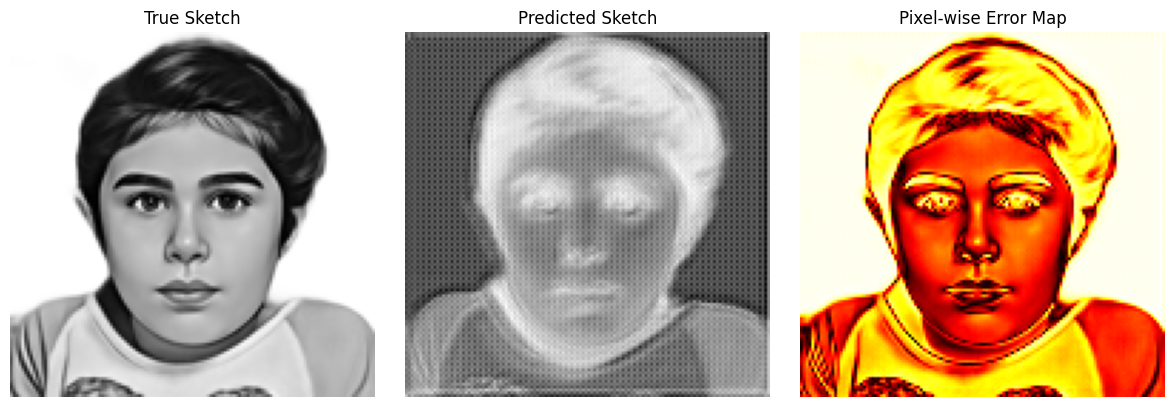

In [23]:
"""
Aim:
Visualize the pixel-wise absolute error between the true sketch and the predicted sketch
from the trained U-Net model. This helps identify areas where the model performs well
and areas where it makes larger errors.
"""

import numpy as np
import matplotlib.pyplot as plt

# Select a random test sample
idx = np.random.randint(len(X_test))

photo = X_test[idx]
true_s = y_test[idx].squeeze()
pred_s = unet_model.predict(photo[None])[0].squeeze()

# Compute pixel-wise absolute error
error_map = np.abs(true_s - pred_s)

# Plot the photo, true sketch, predicted sketch, and error map
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(true_s, cmap='gray')
plt.title("True Sketch")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(pred_s, cmap='gray')
plt.title("Predicted Sketch")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(error_map, cmap='hot')
plt.title("Pixel-wise Error Map")
plt.axis("off")

plt.tight_layout()
plt.show()


In [25]:
import os

# Make sure directory exists
save_dir = "/home/netramn/Desktop/ML"
os.makedirs(save_dir, exist_ok=True)

# Save the model in Keras native format
model_path = os.path.join(save_dir, "imagetosketch.keras")
unet_model.save(model_path, save_format="keras")

print(f"Model saved successfully at: {model_path}")


Model saved successfully at: /home/netramn/Desktop/ML/imagetosketch.keras
